# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


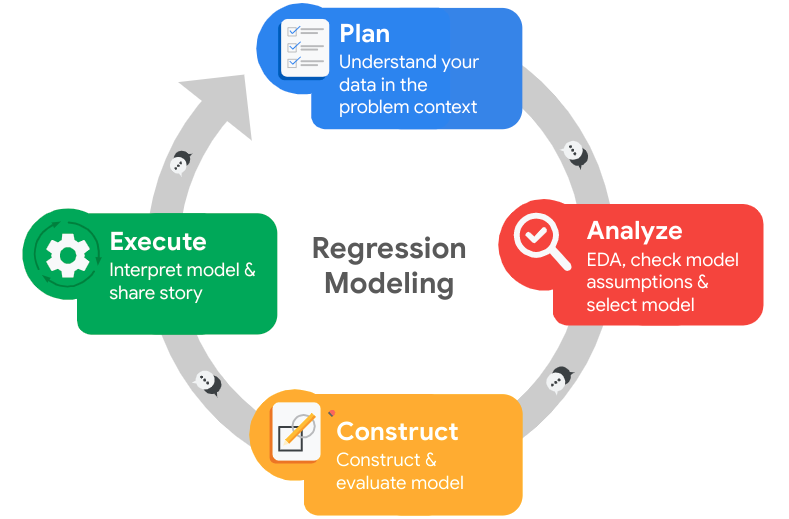

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders of this projects are from the HR department at Salifort Motors.

2. whether an employee is stay or leave the company.If the employee leave what reason or factor that contribute to their quit.

3. From my initial observations the most contribyting factors if an employee left or not in a company are satisfaction_level,salary,work_accident and finally promotion_last_5yrs.

4. I think good understanding of problem,EDA practice and data manipulation skills with visualization skills help me to complete this stage.

5. Yah ethical considerations about a employee leave or stay in a company cannot be any politics among co-workers and from higher officials,there should no bias or partiallity,egos etc.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [346]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [347]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [348]:
# Gather basic information about the data
### YOUR CODE HERE ###
df=df0.copy()
df.isnull().sum().sum()
# No missing values in this dataset.

0

In [349]:
df.shape

(14999, 10)

In [350]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [351]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [352]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [353]:
# Rename columns as needed
### YOUR CODE HERE ###
df.columns=['satisfaction_level', 'last_eval', 'no_projects',
       'avg_montly_hours', 'time_spend_company', 'work_accident', 'left_from_company',
       'promotion_last_5yrs', 'department', 'salary']

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_eval', 'no_projects', 'avg_montly_hours',
       'time_spend_company', 'work_accident', 'left_from_company',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [354]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().sum().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [355]:
# Check for duplicates
### YOUR CODE HERE ###
df.drop_duplicates(inplace=True)

In [356]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df[df.duplicated()]

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_eval,no_projects,avg_montly_hours,time_spend_company,work_accident,left_from_company,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

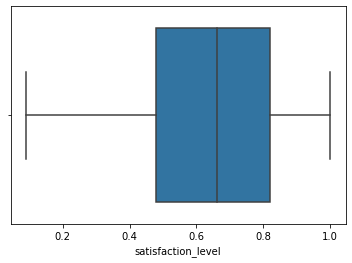

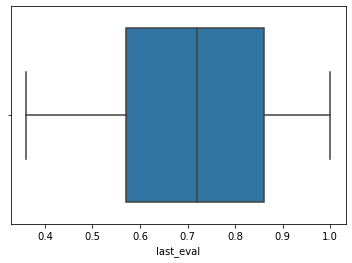

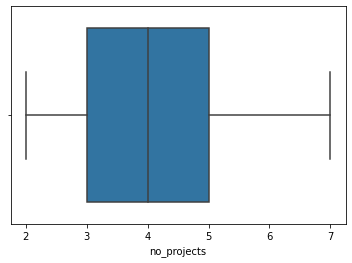

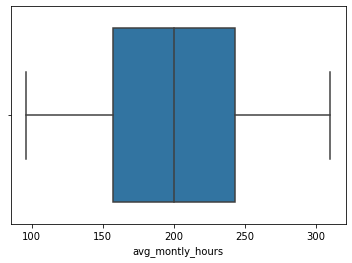

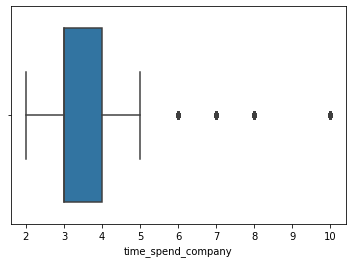

In [357]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
columns=df.select_dtypes(include=['int','float']).columns[:5]
for col in columns:
    sns.boxplot(x=col,data=df)
    plt.show()

In [358]:
# Determine the number of rows containing outliers
### YOUR CODE HERE #
def outliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return (data<lower_bound) | (data>upper_bound)
outliers=df.select_dtypes(include=[int,float]).apply(outliers)
df[outliers.any(axis=1)]

,satisfaction_level,last_eval,no_projects,avg_montly_hours,time_spend_company,work_accident,left_from_company,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. There is relationship between statisfaction_levels  and other attributes like salery,promotion_last_5yrs.One thing is main that the person who lefted the comapny has low satisfaction_levels.
2. There is uniform distribution in all contineous data attributes.Where the categorical attributes are imbalanced or skewed.
3. I done groupby by mean,sum in order to count average satisfaction the person who lefted the comapany and how many peoples lefted based on salary category.
4. EDA is helpful for Feature Engineering like feature selection to build the predictive model.
5. Data visualization tools or packages are so helpful in performing EDA.
6. I don't have any ethical Considerations in this stage.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [359]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
stay,left=df['left_from_company'].value_counts().tolist()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('The percentage of people who left the company:{}%'.format(round(left/(stay+left)*100)))
print('The percentage of people who stayed in the company:{}%'.format(round(stay/(stay+left)*100)))

The percentage of people who left the company:17%
The percentage of people who stayed in the company:83%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

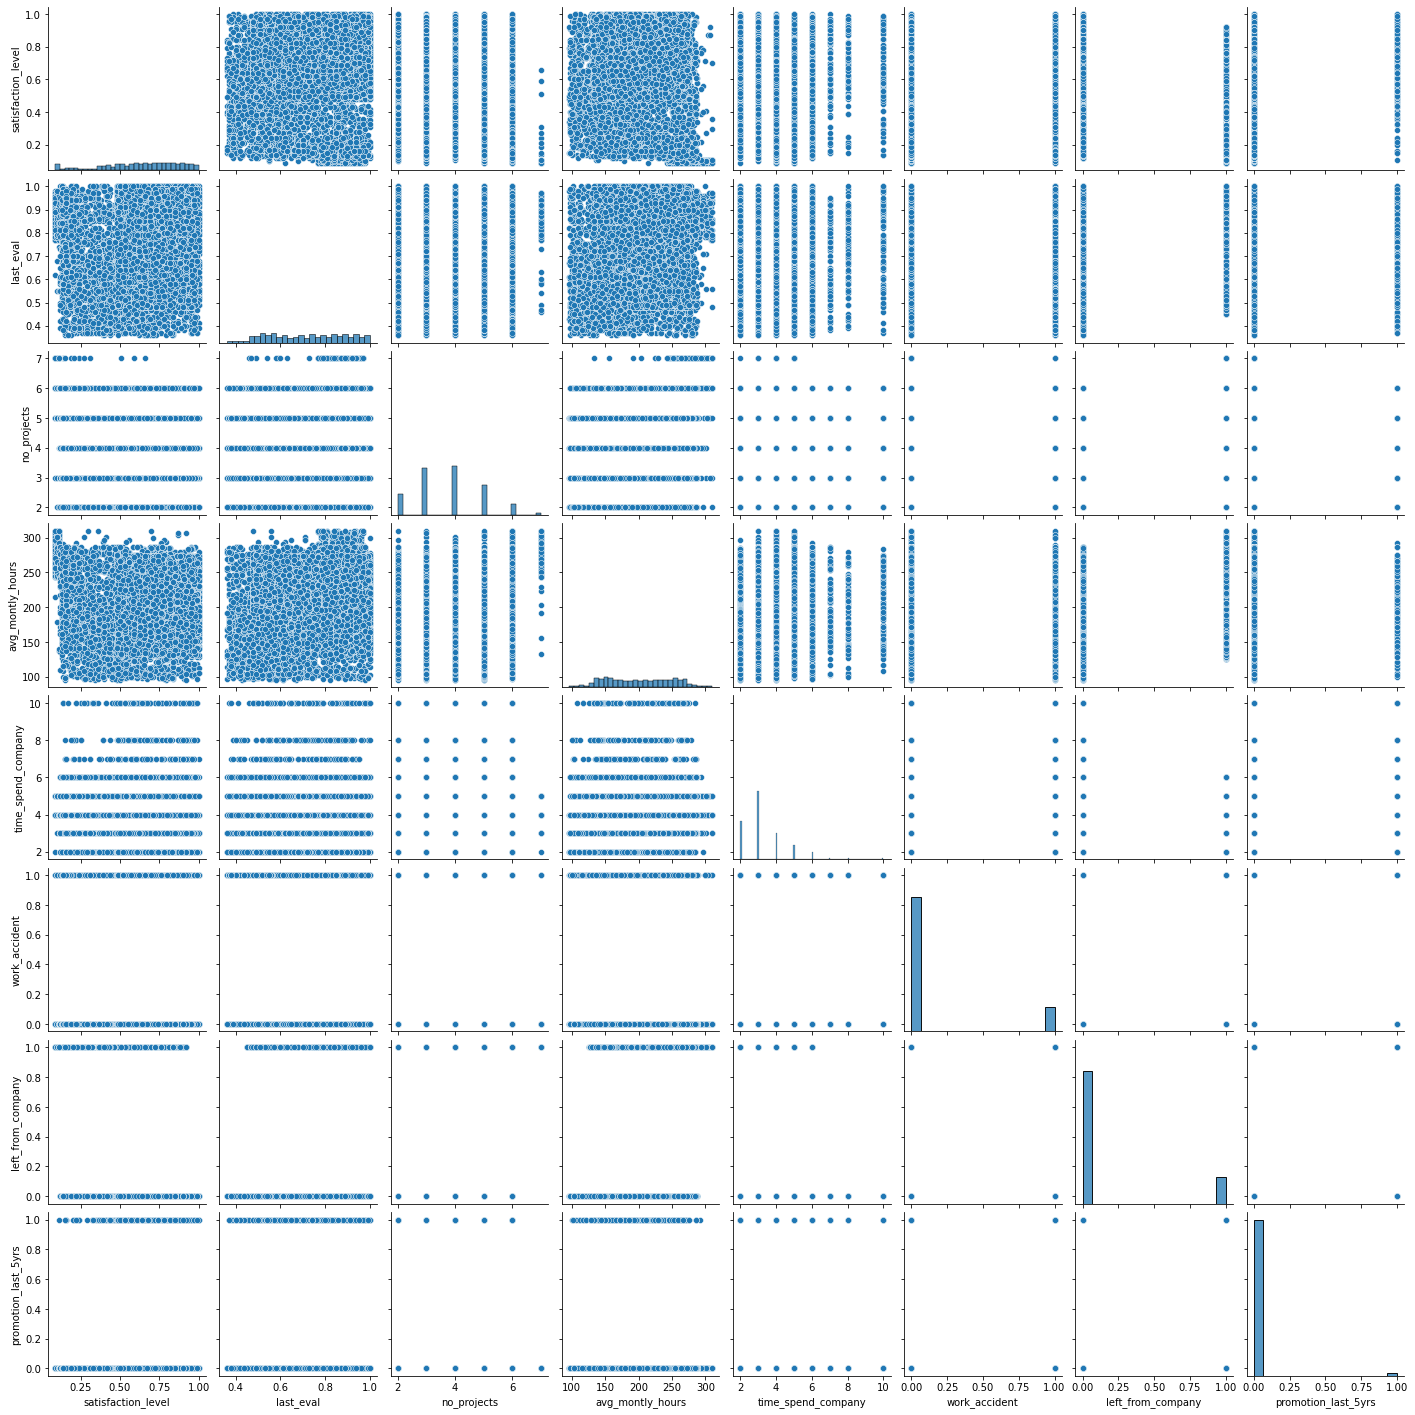

In [360]:
sns.pairplot(df)
plt.show()

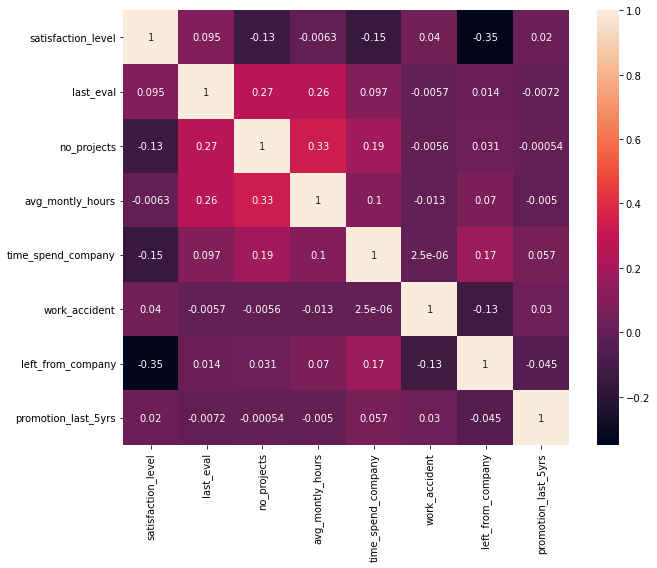

In [361]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,8))
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

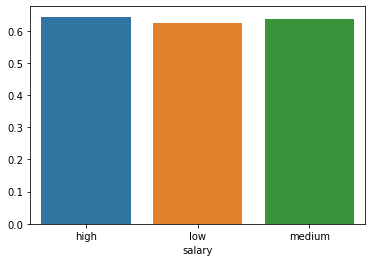

In [362]:
# Create a plot as needed
### YOUR CODE HERE ###
sal=df.groupby('salary')['satisfaction_level'].mean()
sns.barplot(x=sal.index,y=sal.values)
plt.show()

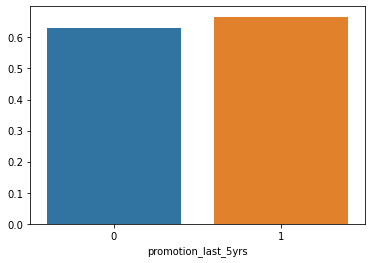

In [363]:
# Create a plot as needed
### YOUR CODE HERE ###
promo=df.groupby('promotion_last_5yrs')['satisfaction_level'].mean()
sns.barplot(x=promo.index,y=promo.values)
plt.show()

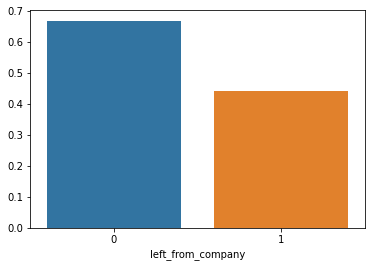

In [364]:
# Create a plot as needed
### YOUR CODE HERE ###
left=df.groupby('left_from_company')['satisfaction_level'].mean()
sns.barplot(x=left.index,y=left.values)
plt.show()

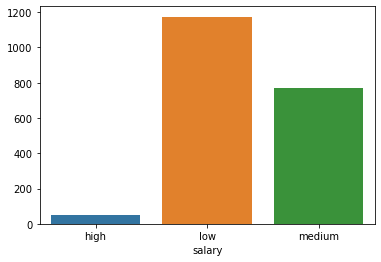

In [365]:
sal_left=df.groupby(['salary'])['left_from_company'].sum()
sns.barplot(x=sal_left.index,y=sal_left.values)
plt.show()

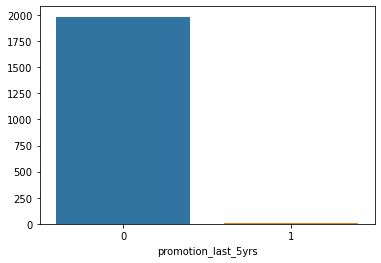

In [366]:
# Create a plot as needed
### YOUR CODE HERE ###
promo=df.groupby('promotion_last_5yrs')['left_from_company'].sum()
sns.barplot(x=promo.index,y=promo.values)
plt.show()

### Insights

1. The person who left the comapny have less staisfaction level than person who stay in the company.
2. The person who get low salary who lefted more,followed by Medium salary,High.
3. The promotion in the last 5 yrs who didnt get promoted have lefted more than who promoted.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [367]:
df.columns

Index(['satisfaction_level', 'last_eval', 'no_projects', 'avg_montly_hours',
       'time_spend_company', 'work_accident', 'left_from_company',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')

In [369]:
df=pd.get_dummies(df,columns=['department'])

In [371]:
df['left_from_company'].value_counts()

0    10000
1     1991
Name: left_from_company, dtype: int64

In [373]:
salary={'low':0,'medium':1,'high':2}
df['salary']=df['salary'].replace(salary)

In [380]:
from sklearn.preprocessing import StandardScaler
x=df.drop('left_from_company',axis=1)
y=df['left_from_company']
scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=42)

In [385]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
y_pred=model.predict(x_test)
print('Accuracy_Score:',metrics.accuracy_score(y_test,y_pred))
print('F1_Score:',metrics.f1_score(y_test,y_pred))
print('Precision_Score:',metrics.precision_score(y_test,y_pred))
print('Recall_Score:',metrics.recall_score(y_test,y_pred))

Accuracy_Score: 0.8340975406419341
F1_Score: 0.27636363636363637
Precision_Score: 0.5
Recall_Score: 0.19095477386934673


In [497]:
from sklearn.model_selection import GridSearchCV
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [498]:
y_pred=model.predict(x_test)
print('Accuracy_Score:',metrics.accuracy_score(y_test,y_pred))
print('F1_Score:',metrics.f1_score(y_test,y_pred))
print('Precision_Score:',metrics.precision_score(y_test,y_pred))
print('Recall_Score:',metrics.recall_score(y_test,y_pred))

Accuracy_Score: 0.9833263859941642
F1_Score: 0.948849104859335
Precision_Score: 0.9661458333333334
Recall_Score: 0.9321608040201005


In [499]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300,max_depth=9,max_features=11,min_samples_leaf=2,min_samples_split=2,max_samples=0.7)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=11,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [500]:
y_pred=model.predict(x_test)
print('Accuracy_Score:',metrics.accuracy_score(y_test,y_pred))
print('F1_Score:',metrics.f1_score(y_test,y_pred))
print('Precision_Score:',metrics.precision_score(y_test,y_pred))
print('Recall_Score:',metrics.recall_score(y_test,y_pred))

Accuracy_Score: 0.9862442684451855
F1_Score: 0.9571984435797665
Precision_Score: 0.9892761394101877
Recall_Score: 0.9271356783919598


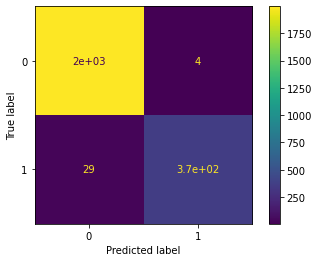

In [501]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=model.classes_)
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.